# Fatal Accidents by the surrounding location venues

## Hidden cell is project token

In [241]:
# The code was removed by Watson Studio for sharing.

In [242]:
# Import packages
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # library to handle JSON files
print('Libraries imported.')

Libraries imported.


In [243]:
# Read CSV from Killed or seriously injured csv
df = pd.read_csv(project.get_file('KSI_CLEAN.csv'))
df.head()

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,...,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
0,1249781,2011,8,4,23,18,3,43.651545,-79.383490,Toronto Centre-Rosedale (27),...,0,1,0,0,0,0,0,0,0,0
1,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
2,5002235651,2015,12,30,23,39,2,43.682342,-79.328266,Toronto-Danforth (30),...,0,0,0,0,0,1,0,0,0,1
3,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
4,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0


In [244]:
df.describe()

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_ID,...,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
count,1.255700e+04,12557.000000,12557.00000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,...,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000
mean,1.576768e+09,2011.547822,6.76746,15.646333,13.167317,28.246317,2.987099,43.710715,-79.395989,22.565820,...,0.063391,0.065063,0.001195,0.368878,0.174405,0.511189,0.084335,0.043163,0.028351,0.136657
std,2.541023e+09,3.104151,3.27867,8.861354,6.242482,17.515703,1.965007,0.056025,0.104216,12.531213,...,0.243674,0.246647,0.034543,0.482520,0.379472,0.499895,0.277901,0.203232,0.165979,0.343498
min,1.284070e+05,2007.000000,1.00000,1.000000,0.000000,0.000000,0.000000,43.592048,-79.638390,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.108321e+06,2009.000000,4.00000,8.000000,9.000000,13.000000,1.000000,43.662645,-79.467434,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.276036e+06,2011.000000,7.00000,16.000000,14.000000,30.000000,3.000000,43.702345,-79.396490,23.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.002384e+09,2014.000000,10.00000,23.000000,18.000000,44.000000,5.000000,43.755992,-79.318090,34.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7.003292e+09,2017.000000,12.00000,31.000000,23.000000,59.000000,6.000000,43.855445,-79.125897,44.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [245]:
# Check for null values
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [246]:
# Get rid of all columns that are unnecassary we only want fatal accidents, lattiude and longitude. 
col_list = ['ACCNUM', 'LATITUDE', 'LONGITUDE', 'YEAR', 'FATAL']
df_2 = df[col_list]
df_2.head()

,ACCNUM,LATITUDE,LONGITUDE,YEAR,FATAL
0,1249781,43.651545,-79.383490,2011,0
1,1311542,43.780445,-79.300490,2012,0
2,5002235651,43.682342,-79.328266,2015,1
3,1311542,43.780445,-79.300490,2012,0
4,1311542,43.780445,-79.300490,2012,0


In [247]:
#Getting df_2 values for greater than or equal to 2010 because folium can't map more and takes too long to load
df_2 = df_2[df_2['YEAR']>=2015]

In [248]:
# Drop values where Fatal = 0
df_2 = df_2[df_2['FATAL']==1].reset_index(drop=True)
df_2.head()

,ACCNUM,LATITUDE,LONGITUDE,YEAR,FATAL
0,5002235651,43.682342,-79.328266,2015,1
1,5000995174,43.674713,-79.396595,2015,1
2,5000995174,43.674713,-79.396595,2015,1
3,7001535588,43.748764,-79.312077,2017,1
4,7001535588,43.748764,-79.312077,2017,1


In [249]:
# Drop duplicate rows due to more than one involved in accident
df_2.drop_duplicates(keep="last",inplace=True) 


In [250]:
len(df_2)

201

## Mapping Toronto Accidents

In [251]:
# Define function to map Toronto using folium
def generate_map(dataframe, longitude, latitude):
        map = folium.Map(location=[latitude, longitude], zoom_start=10)
        # add markers to map
        for lat, lng, in zip(dataframe['LATITUDE'], dataframe['LONGITUDE']):
            label = 'Fatal'
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=3,
                popup=label,
                color='red',
                fill=True,
                fill_color='#cc3131',
                fill_opacity=0.7,
                parse_html=False).add_to(map)  
        return map

In [252]:
# Get Toronto Lattiude and Longitude variables and generate map using function
lat = 43.6527
lng = -78.3834


map_toronto = generate_map(df_2, lng, lat)
map_toronto

## Using Foursquare API to get 100 Venues nearby

### Hidden cell contains api credentials

In [253]:
# The code was removed by Watson Studio for sharing.

In [313]:
# Function to get all nearby venues for t_bough 
def getNearbyVenues(names, latitudes, longitudes, radius=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['ACCNUM', 
                  'Accident Latitude', 
                  'Accident Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [314]:
accident_venues = getNearbyVenues(names=df_2['ACCNUM'],
                                   latitudes=df_2['LATITUDE'],
                                   longitudes=df_2['LONGITUDE']
                                  )

5000995174
7001535588
7003112978
5002235651
2015543987
7001803207
7001319124
5001691895
7000795019
7001287888
7001544325
7000637893
6001750735
5001407837
7003087545
6001376721
6000080482
7001542101
5000922282
7003200949
5002147377
6001813893
6001974222
6001813950
6001174210
7000983227
7000861875
5001332825
7003233329
7003060621
6001807391
7000395986
6000755736
6000164025
5002027343
6000188538
5001538313
6001731128
6000530490
6000595012
6001466377
7001855401
7000961019
6000441684
6000243323
6000261829
7000337302
6000500403
6001289424
6001951366
7001709828
6001741045
5001628551
5001940328
5002074254
7000485980
7001224899
5000471839
5000560313
6002089290
6001753301
2015375108
6000101056
6000746605
7001762491
7000701050
7000416403
7001794171
7001052989
2015374256
2015518760
6001911469
5001534311
6002131954
5001457314
5001276114
2015979465
5000516992
7000606743
5000653521
6001648005
6001174772
7000396718
6000291466
6000894195
7001169974
6002160952
7001372973
7000012031
6002021851
1501518617

In [315]:
len(accident_venues)

513

In [316]:
print(accident_venues.shape)
accident_venues.head()

(513, 7)


,ACCNUM,Accident Latitude,Accident Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,5000995174,43.674713,-79.396595,L'Unita Restaurant,43.674387,-79.396488,Italian Restaurant
1,5000995174,43.674713,-79.396595,Joso's,43.674835,-79.396171,Mediterranean Restaurant
2,5000995174,43.674713,-79.396595,Bang & Olufsen Yorkville,43.674831,-79.396611,Electronics Store
3,7001535588,43.748764,-79.312077,Rexall,43.748619,-79.311700,Pharmacy
4,5002235651,43.682342,-79.328266,The Wren,43.682467,-79.328079,American Restaurant


In [317]:
#Let's check how many venues were returned for each Accident
accident_venues.groupby('ACCNUM').count()

,Accident Latitude,Accident Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
ACCNUM,,,,,,
201558185,3,3,3,3,3,3
1501079056,3,3,3,3,3,3
1501518617,6,6,6,6,6,6
1501750958,1,1,1,1,1,1
2015160956,1,1,1,1,1,1
2015275153,3,3,3,3,3,3
2015374256,2,2,2,2,2,2
2015466893,1,1,1,1,1,1
2015518760,4,4,4,4,4,4


In [318]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(accident_venues['Venue Category'].unique())))

There are 156 uniques categories.


In [319]:
project.save_data(data=accident_venues.to_csv(index=False),file_name='accident_venues100m.csv',overwrite=True)

{'file_name': 'accident_venues100m.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'scraping-donotdelete-pr-egmftc4wqqy0tc',
 'asset_id': '5103b09d-4704-421f-bb10-0669d50ee4e6'}

# Analyze Each Accident

In [320]:
# one hot encoding
onehot = pd.get_dummies(accident_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['ACCNUM'] = accident_venues['ACCNUM'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,ACCNUM,Afghan Restaurant,American Restaurant,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,...,Theater,Thrift / Vintage Store,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,5000995174,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5000995174,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5000995174,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7001535588,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5002235651,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [321]:
# get shape of onehot df
onehot.shape

(513, 157)

In [322]:
# Next, let's group rows by Accident and by taking the mean of the frequency of occurrence of each category
grouped = onehot.groupby('ACCNUM').mean().reset_index()
grouped.head()

,ACCNUM,Afghan Restaurant,American Restaurant,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,...,Theater,Thrift / Vintage Store,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,201558185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1501079056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1501518617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1501750958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015160956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [323]:
#Create the new dataframe and display the top 10 venues for each neighborhood.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [324]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['ACCNUM']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
acc_venues_sorted = pd.DataFrame(columns=columns)
acc_venues_sorted['ACCNUM'] = grouped['ACCNUM']

for ind in np.arange(grouped.shape[0]):
    acc_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

acc_venues_sorted.head()

,ACCNUM,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,201558185,Sculpture Garden,Coffee Shop,Café,Event Space,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
1,1501079056,Sporting Goods Shop,Gym,Beer Store,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant
2,1501518617,Cosmetics Shop,Pharmacy,Liquor Store,Supermarket,Bank,Bus Line,Falafel Restaurant,Food,Flea Market,Fish Market
3,1501750958,Baseball Field,Fried Chicken Joint,Food Truck,Food & Drink Shop,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
4,2015160956,Gymnastics Gym,Yoga Studio,Event Space,Food & Drink Shop,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant


In [325]:
toronto_grouped_clustering = grouped.drop('ACCNUM', 1)

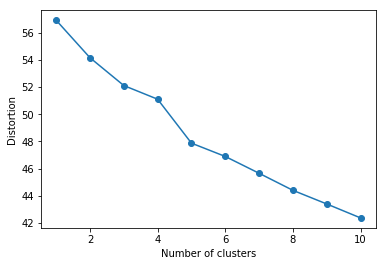

In [326]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(toronto_grouped_clustering)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [327]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [328]:
# add clustering labels
acc_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

toronto_merged = df_2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(acc_venues_sorted.set_index('ACCNUM'), on='ACCNUM')
toronto_merged = toronto_merged.reset_index(drop=True)
toronto_merged.head()



,ACCNUM,LATITUDE,LONGITUDE,YEAR,FATAL,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5000995174,43.674713,-79.396595,2015,1,3.0,Italian Restaurant,Electronics Store,Mediterranean Restaurant,Yoga Studio,Fast Food Restaurant,Food Truck,Food & Drink Shop,Food,Flea Market,Fish Market
1,7001535588,43.748764,-79.312077,2017,1,2.0,Pharmacy,Yoga Studio,Event Service,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space
2,7003112978,43.751869,-79.286602,2017,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5002235651,43.682342,-79.328266,2015,1,3.0,Café,American Restaurant,Ethiopian Restaurant,Middle Eastern Restaurant,Gym / Fitness Center,Bar,Coffee Shop,Yoga Studio,Fast Food Restaurant,Food
4,2015543987,43.637428,-79.412121,2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [341]:
len(toronto_merged)

123

In [331]:
toronto_merged["Cluster_Labels"] =toronto_merged["Cluster_Labels"].astype('float')

In [332]:
toronto_merged = toronto_merged.dropna(how = 'any')

In [333]:
toronto_merged["Cluster_Labels"] = toronto_merged["Cluster_Labels"].astype(int)
toronto_merged.head()

,ACCNUM,LATITUDE,LONGITUDE,YEAR,FATAL,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5000995174,43.674713,-79.396595,2015,1,3,Italian Restaurant,Electronics Store,Mediterranean Restaurant,Yoga Studio,Fast Food Restaurant,Food Truck,Food & Drink Shop,Food,Flea Market,Fish Market
1,7001535588,43.748764,-79.312077,2017,1,2,Pharmacy,Yoga Studio,Event Service,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space
3,5002235651,43.682342,-79.328266,2015,1,3,Café,American Restaurant,Ethiopian Restaurant,Middle Eastern Restaurant,Gym / Fitness Center,Bar,Coffee Shop,Yoga Studio,Fast Food Restaurant,Food
5,7001803207,43.755550,-79.347981,2017,1,2,Pizza Place,Sandwich Place,Asian Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
6,7001319124,43.760803,-79.215763,2017,1,2,Sandwich Place,Yoga Studio,Event Service,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space


In [334]:
# visualize clusters
# create map
map_clusters = folium.Map(location=[lat, lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['LATITUDE'], toronto_merged['LONGITUDE'], toronto_merged['ACCNUM'], toronto_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [335]:
toronto_merged.loc[toronto_merged['Cluster_Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,LATITUDE,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,43.816845,0,Spa,Intersection,Event Space,Food & Drink Shop,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
21,43.674713,0,Café,Italian Restaurant,Bakery,Bar,Coffee Shop,Yoga Studio,Falafel Restaurant,Food & Drink Shop,Food,Flea Market
22,43.648159,0,Dessert Shop,Breakfast Spot,Coffee Shop,Pub,Liquor Store,Restaurant,Sushi Restaurant,Yoga Studio,Falafel Restaurant,Flea Market
23,43.734520,0,Pizza Place,Chinese Restaurant,Coffee Shop,Rental Car Location,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space
24,43.736534,0,Caribbean Restaurant,Pizza Place,Food Truck,Food & Drink Shop,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
30,43.756446,0,Bus Station,Yoga Studio,Falafel Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Event Space
32,43.672748,0,Ice Cream Shop,Bakery,Pub,Ramen Restaurant,Mexican Restaurant,Gastropub,French Restaurant,Indian Restaurant,Gymnastics Gym,Ethiopian Restaurant
33,43.636100,0,Women's Store,Fried Chicken Joint,Turkish Restaurant,Café,Thai Restaurant,Sandwich Place,Greek Restaurant,Yoga Studio,Event Space,Fish Market
35,43.599964,0,Park,Yoga Studio,Event Service,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space
37,43.669960,0,BBQ Joint,Yoga Studio,Falafel Restaurant,Food Truck,Food & Drink Shop,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant


In [336]:
toronto_merged.loc[toronto_merged['Cluster_Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,LATITUDE,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
69,43.812961,1,Afghan Restaurant,Gym,Event Space,Food & Drink Shop,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
70,43.794639,1,Ice Cream Shop,Coffee Shop,Sushi Restaurant,Beer Store,Falafel Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Filipino Restaurant
76,43.769264,1,Sushi Restaurant,Discount Store,Movie Theater,Café,Pet Store,Shopping Mall,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop
90,43.623172,1,Cosmetics Shop,Pharmacy,Liquor Store,Supermarket,Bank,Bus Line,Falafel Restaurant,Food,Flea Market,Fish Market
140,43.812130,1,Japanese Restaurant,Shopping Mall,Tea Room,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant
147,43.765434,1,Gymnastics Gym,Yoga Studio,Event Space,Food & Drink Shop,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
160,43.692527,1,Cheese Shop,Yoga Studio,Food & Drink Shop,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space
174,43.686813,1,Sporting Goods Shop,Gym,Beer Store,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant
179,43.735164,1,Indian Restaurant,Liquor Store,Bakery,Sandwich Place,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Filipino Restaurant
185,43.660934,1,Bakery,Market,Middle Eastern Restaurant,Café,Coffee Shop,Bar,Sushi Restaurant,Fast Food Restaurant,Food,Flea Market


In [337]:
toronto_merged.loc[toronto_merged['Cluster_Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,LATITUDE,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,43.748764,2,Pharmacy,Yoga Studio,Event Service,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space
5,43.755550,2,Pizza Place,Sandwich Place,Asian Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
6,43.760803,2,Sandwich Place,Yoga Studio,Event Service,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space
9,43.734024,2,Caribbean Restaurant,Yoga Studio,Falafel Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Event Space
11,43.732021,2,Furniture / Home Store,Coffee Shop,Yoga Studio,Falafel Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant
17,43.649501,2,Café,Bar,Wine Bar,Vegetarian / Vegan Restaurant,Breakfast Spot,Coffee Shop,Grocery Store,Sandwich Place,Restaurant,Korean Restaurant
19,43.648544,2,Cocktail Bar,Moroccan Restaurant,Pharmacy,Comfort Food Restaurant,Mexican Restaurant,Restaurant,Bistro,Jazz Club,Coffee Shop,Italian Restaurant
25,43.706268,2,Pizza Place,Coffee Shop,Sushi Restaurant,Pharmacy,Dance Studio,Event Space,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant
26,43.758728,2,Spa,Hakka Restaurant,Paper / Office Supplies Store,Discount Store,Sushi Restaurant,Event Space,Food,Flea Market,Fish Market,Filipino Restaurant
28,43.654327,2,Breakfast Spot,Falafel Restaurant,Restaurant,Bus Stop,Whisky Bar,Flea Market,Sports Bar,Bakery,Candy Store,Bar


In [338]:
toronto_merged.loc[toronto_merged['Cluster_Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,LATITUDE,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,43.674713,3,Italian Restaurant,Electronics Store,Mediterranean Restaurant,Yoga Studio,Fast Food Restaurant,Food Truck,Food & Drink Shop,Food,Flea Market,Fish Market
3,43.682342,3,Café,American Restaurant,Ethiopian Restaurant,Middle Eastern Restaurant,Gym / Fitness Center,Bar,Coffee Shop,Yoga Studio,Fast Food Restaurant,Food
13,43.732986,3,Café,Gym / Fitness Center,Restaurant,Golf Course,Yoga Studio,Event Service,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant
18,43.755539,3,Bus Stop,Bank,Yoga Studio,Falafel Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant
20,43.701564,3,Grocery Store,Thrift / Vintage Store,Pizza Place,Dance Studio,Deli / Bodega,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant
27,43.715347,3,Convenience Store,Yoga Studio,Event Space,Food & Drink Shop,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
34,43.704074,3,Sushi Restaurant,Pet Store,Spa,Bagel Shop,Bakery,Coffee Shop,Yoga Studio,Event Space,Flea Market,Fish Market
52,43.767913,3,Chinese Restaurant,Coffee Shop,Japanese Restaurant,Caribbean Restaurant,Sandwich Place,Yoga Studio,Food,Flea Market,Fish Market,Filipino Restaurant
53,43.702869,3,Mexican Restaurant,Asian Restaurant,Bus Stop,Thrift / Vintage Store,Yoga Studio,Falafel Restaurant,Food,Flea Market,Fish Market,Filipino Restaurant
57,43.681034,3,Italian Restaurant,Restaurant,Burger Joint,Martial Arts Dojo,Peruvian Restaurant,Sushi Restaurant,Jewish Restaurant,Greek Restaurant,Gift Shop,Coffee Shop


In [339]:
toronto_merged.loc[toronto_merged['Cluster_Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,LATITUDE,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
137,43.669097,4,Sculpture Garden,Coffee Shop,Café,Event Space,Food,Flea Market,Fish Market,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
